In [150]:
import pandas as pd
import matplotlib.pyplot as plt
# Charger le dataset
df = pd.read_csv("datauber.csv")

# Voir les 5 premières lignes
print(df.head())

   Unnamed: 0                            key  fare_amount  \
0  24238194.0    2015-05-07 19:52:06.0000003          7.5   
1  27835199.0    2009-07-17 20:04:56.0000002          7.7   
2  44984355.0   2009-08-24 21:45:00.00000061         12.9   
3  25894730.0    2009-06-26 08:22:21.0000001          5.3   
4  17610152.0  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2                      NaN        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124              NaN   
4  2014-08-28 17:47:00 UTC               NaN        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217              1.0  
1         -73.994710         40.750325              1.0  
2                NaN         40.772647              1.0  
3         

In [152]:
print(df.info())

# Dimensions du dataset
print("Nombre de lignes:", df.shape[0])
print("Nombre de colonnes:", df.shape[1])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44377 entries, 0 to 44376
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         42243 non-null  float64
 1   key                42143 non-null  object 
 2   fare_amount        42217 non-null  float64
 3   pickup_datetime    42094 non-null  object 
 4   pickup_longitude   42183 non-null  float64
 5   pickup_latitude    42130 non-null  float64
 6   dropoff_longitude  42183 non-null  float64
 7   dropoff_latitude   42119 non-null  float64
 8   passenger_count    42159 non-null  float64
dtypes: float64(7), object(2)
memory usage: 3.0+ MB
None
Nombre de lignes: 44377
Nombre de colonnes: 9


In [154]:
print(df.describe())

         Unnamed: 0   fare_amount  pickup_longitude  pickup_latitude  \
count  4.224300e+04  42217.000000      42183.000000     42130.000000   
mean   2.767290e+07     11.409233        -72.568666        39.948790   
std    1.602678e+07     10.091979         10.776933         6.006307   
min    4.800000e+01      0.000000       -748.016667       -74.015515   
25%    1.372484e+07      6.000000        -73.992075        40.734808   
50%    2.765192e+07      8.500000        -73.981857        40.752503   
75%    4.151020e+07     12.600000        -73.967187        40.767077   
max    5.542169e+07    350.000000         40.774042        45.031653   

       dropoff_longitude  dropoff_latitude  passenger_count  
count       42183.000000      42119.000000     42159.000000  
mean          -72.588555         39.957229         1.677720  
std            10.684628          5.962407         1.296484  
min          -737.916665        -74.008745         0.000000  
25%           -73.991496         40.73376

# Valeurs manquantes

In [157]:
print(df.isnull().sum())

Unnamed: 0           2134
key                  2234
fare_amount          2160
pickup_datetime      2283
pickup_longitude     2194
pickup_latitude      2247
dropoff_longitude    2194
dropoff_latitude     2258
passenger_count      2218
dtype: int64


# Vérifier les tarifs négatifs

In [160]:
print(df[df["fare_amount"] < 0])

Empty DataFrame
Columns: [Unnamed: 0, key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count]
Index: []


# Nombre de passagers = 0 ou trop grand

In [163]:
print("Courses avec passagers anormaux:")
print(df[(df["passenger_count"] <= 0) | (df["passenger_count"] > 6)])

Courses avec passagers anormaux:
       Unnamed: 0                          key  fare_amount  \
333     2137942.0  2011-08-05 07:03:08.0000001         10.1   
908     8484351.0  2011-09-06 12:25:19.0000002         11.7   
926    32941306.0  2012-03-26 18:11:24.0000002          NaN   
2000   12591041.0  2012-04-20 15:07:57.0000003         15.7   
3011   39400625.0  2012-01-07 19:19:08.0000004          6.1   
...           ...                          ...          ...   
44145   6551885.0                          NaN          6.9   
44189  19984528.0  2012-01-25 09:49:09.0000004          8.9   
44210  54943918.0  2012-03-02 21:09:37.0000001         27.7   
44214  32887001.0  2011-09-23 00:15:08.0000005         10.5   
44243   5387668.0                          NaN          2.9   

               pickup_datetime  pickup_longitude  pickup_latitude  \
333    2011-08-05 07:03:08 UTC        -74.013900        40.707800   
908    2011-09-06 12:25:19 UTC               NaN        40.764600   
926

## Distribution de la variable cible (fare_amount)

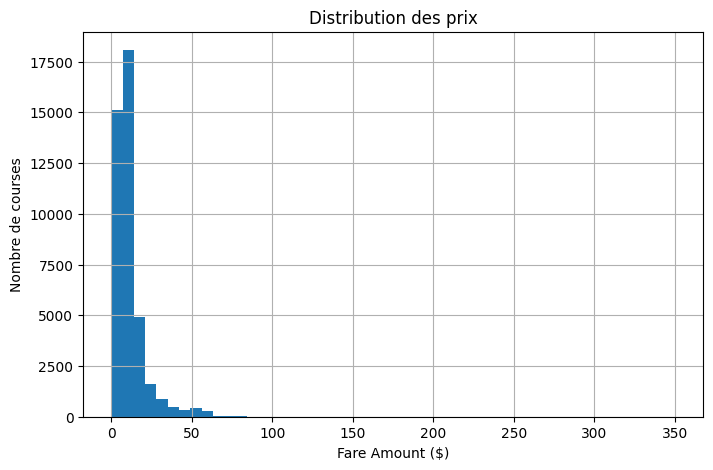

In [166]:
plt.figure(figsize=(8,5))
df["fare_amount"].hist(bins=50)
plt.xlabel("Fare Amount ($)")
plt.ylabel("Nombre de courses")
plt.title("Distribution des prix")
plt.show()

## Extraire les informations temporelles

In [169]:
# Conversion de la colonne date
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"], errors="coerce")

# Extraire heure, jour de la semaine, mois
df["hour"] = df["pickup_datetime"].dt.hour
df["day_of_week"] = df["pickup_datetime"].dt.dayofweek  # 0=lundi
df["month"] = df["pickup_datetime"].dt.month

print(df[["pickup_datetime", "hour", "day_of_week", "month"]].head())

            pickup_datetime  hour  day_of_week  month
0 2015-05-07 19:52:06+00:00  19.0          3.0    5.0
1 2009-07-17 20:04:56+00:00  20.0          4.0    7.0
2                       NaT   NaN          NaN    NaN
3 2009-06-26 08:22:21+00:00   8.0          4.0    6.0
4 2014-08-28 17:47:00+00:00  17.0          3.0    8.0


## Donc les hypotheses 
# 1/ Les prix augmentent avec la distance ?

# 2/ Les prix dépendent aussi de l’heure (nuit vs jour, rush hour vs calme) ?

# 3/ Le nombre de passagers influence le prix ?

##                                  ----------------------------------------

## Calcul de la distance (formule de Haversine)

In [174]:
import numpy as np

def haversine_distance(lat1, lon1, lat2, lon2):
    R = 6371  # rayon de la Terre en km
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

df["distance_km"] = haversine_distance(
    df["pickup_latitude"], df["pickup_longitude"],
    df["dropoff_latitude"], df["dropoff_longitude"]
)

print(df[["fare_amount", "distance_km"]].head())

   fare_amount  distance_km
0          7.5     1.683323
1          7.7     2.457590
2         12.9          NaN
3          5.3          NaN
4         16.0          NaN


In [176]:
# Nous avons des valeurs NaN dans la colonne distance_km car certaines lignes (pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude) contiennent soit :
# -des valeurs manquantes (NaN)

In [178]:
print(df[["pickup_latitude", "pickup_longitude", "dropoff_latitude", "dropoff_longitude"]].isnull().sum())


pickup_latitude      2247
pickup_longitude     2194
dropoff_latitude     2258
dropoff_longitude    2194
dtype: int64


In [180]:
# Vérifier si des latitudes/longitudes sont hors limites
print(df[(df["pickup_latitude"] < -90) | (df["pickup_latitude"] > 90)])
print(df[(df["pickup_longitude"] < -180) | (df["pickup_longitude"] > 180)])
print(df[(df["dropoff_latitude"] < -90) | (df["dropoff_latitude"] > 90)])
print(df[(df["dropoff_longitude"] < -180) | (df["dropoff_longitude"] > 180)])


Empty DataFrame
Columns: [Unnamed: 0, key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day_of_week, month, distance_km]
Index: []
      Unnamed: 0                            key  fare_amount  \
4949  42931506.0  2012-04-28 00:58:00.000000235          4.9   

               pickup_datetime  pickup_longitude  pickup_latitude  \
4949 2012-04-28 00:58:00+00:00       -748.016667        40.739957   

      dropoff_longitude  dropoff_latitude  passenger_count  hour  day_of_week  \
4949          -74.00357         40.734192              1.0   0.0          5.0   

      month  distance_km  
4949    4.0  3828.760217  
Empty DataFrame
Columns: [Unnamed: 0, key, fare_amount, pickup_datetime, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, hour, day_of_week, month, distance_km]
Index: []
       Unnamed: 0                           key  fare_amount  \
32549   5634081.0  2012-06-16

In [182]:
# Ces résultats montrent :
# **Pas d’anomalies dans pickup_latitude/dropoff_latitude
#✔︎ Toutes les valeurs de latitude sont dans l’intervalle valide [-90, 90].

# **Des anomalies dans pickup_longitude et dropoff_longitude
# pickup_longitude = -748.016667 ou dropoff_longitude = -737.916665.
#➝ C’est impossible car les longitudes réelles doivent être entre [-180, 180].
#➝ Résultat : ça crée des distances aberrantes (3828 km, 4644 km) → clairement faux pour un trajet Uber dans New York.

## Relation distance ↔ prix

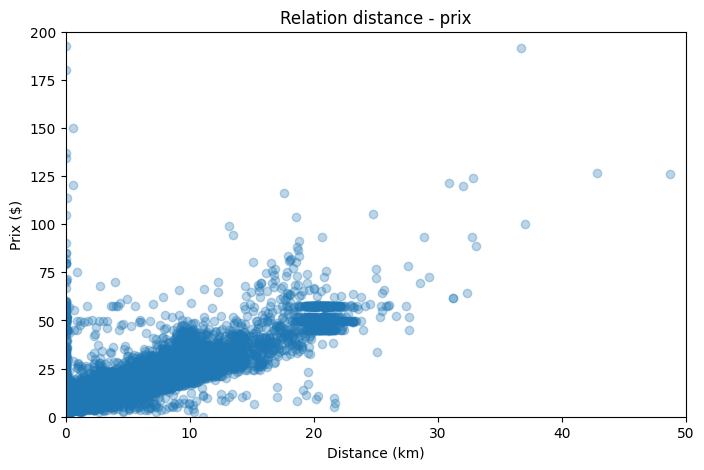

In [185]:
plt.figure(figsize=(8,5))
plt.scatter(df["distance_km"], df["fare_amount"], alpha=0.3)
plt.xlabel("Distance (km)")
plt.ylabel("Prix ($)")
plt.title("Relation distance - prix")
plt.xlim(0, 50)  # pour limiter aux courses < 50km
plt.ylim(0, 200) # limiter prix max
plt.show()


## Relation heure ↔ prix moyen

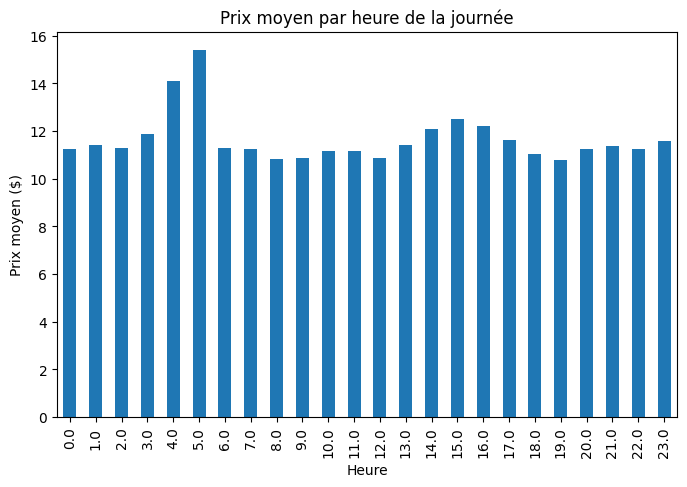

In [188]:
hourly_fares = df.groupby("hour")["fare_amount"].mean()

plt.figure(figsize=(8,5))
hourly_fares.plot(kind="bar")
plt.xlabel("Heure")
plt.ylabel("Prix moyen ($)")
plt.title("Prix moyen par heure de la journée")
plt.show()

## Relation passagers ↔ prix moyen

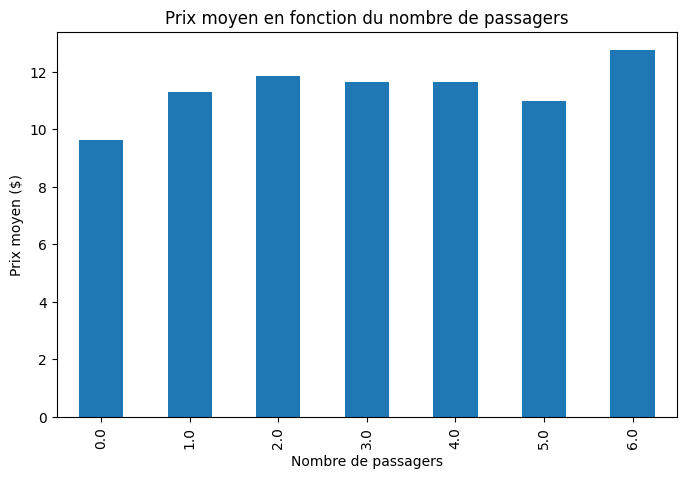

In [195]:
passenger_fares = df.groupby("passenger_count")["fare_amount"].mean()

plt.figure(figsize=(8,5))
passenger_fares.plot(kind="bar")
plt.xlabel("Nombre de passagers")
plt.ylabel("Prix moyen ($)")
plt.title("Prix moyen en fonction du nombre de passagers")
plt.show()


In [197]:
import pandas as pd

# 1. Colonnes numériques → remplacer NaN par la médiane
num_cols = df.select_dtypes(include=["float64", "int64"]).columns
for col in num_cols:
    median_val = df[col].median()
    df[col].fillna(median_val, inplace=True)

# 2. Colonnes catégorielles (object, string) → remplacer NaN par la valeur la plus fréquente
cat_cols = df.select_dtypes(include=["object"]).columns
for col in cat_cols:
    mode_val = df[col].mode()[0]  # la valeur la plus fréquente
    df[col].fillna(mode_val, inplace=True)

# Vérif rapide : plus de NaN ?
print(df.isna().sum())


Unnamed: 0              0
key                     0
fare_amount             0
pickup_datetime      2283
pickup_longitude        0
pickup_latitude         0
dropoff_longitude       0
dropoff_latitude        0
passenger_count         0
hour                    0
day_of_week             0
month                   0
distance_km             0
dtype: int64


C:\Users\bahae\AppData\Local\Temp\ipykernel_18492\4260505582.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_val, inplace=True)
C:\Users\bahae\AppData\Local\Temp\ipykernel_18492\4260505582.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, w

In [199]:
# Vérifier si la colonne 'key' est unique
nb_total = len(df)
nb_unique = df["key"].nunique()

print(f"Nombre total de lignes     : {nb_total}")
print(f"Nombre de 'key' uniques    : {nb_unique}")
print(f"Doublons trouvés           : {nb_total - nb_unique}")


Nombre total de lignes     : 44377
Nombre de 'key' uniques    : 42040
Doublons trouvés           : 2337


In [201]:
# 1. Chercher les clés dupliquées
duplicates = df[df.duplicated(subset=["key"], keep=False)].sort_values("key")

# 2. Afficher les valeurs associées pour comparer
print(duplicates)

# 3. Vérifier si les doublons sont vraiment identiques sur toutes les colonnes
duplicates_check = df[df.duplicated(keep=False)] \
    .groupby("key") \
    .nunique()

print(duplicates_check)


       Unnamed: 0                           key  fare_amount  \
23     25121708.0   2009-01-18 01:03:55.0000002         7.70   
29402  51613578.0   2009-01-18 01:03:55.0000002         3.70   
29394  27651919.0   2009-01-18 01:03:55.0000002         4.00   
29386  27651919.0   2009-01-18 01:03:55.0000002        35.83   
29372  37737537.0   2009-01-18 01:03:55.0000002        18.50   
...           ...                           ...          ...   
2217   18651132.0  2014-12-16 13:54:00.00000064        16.00   
37491  50966936.0   2015-01-28 17:54:06.0000001         5.50   
44275  50966936.0   2015-01-28 17:54:06.0000001         5.50   
39043  49164819.0   2015-01-29 15:15:06.0000007        41.33   
44296  49164819.0   2015-01-29 15:15:06.0000007        41.33   

                pickup_datetime  pickup_longitude  pickup_latitude  \
23    2010-09-04 16:12:00+00:00        -73.994300        40.739512   
29402 2010-04-02 13:53:42+00:00        -73.953696        40.785270   
29394 2013-05-24 23:0